# Artificial Neural Networks

An **Artificial Neural Networs** (ANN) is a model inspired by the network of biological neurons found in our brains. A neuron is a cell composed of a **cell body** containing the **nucleus** and most of the cell’s complex components, many branching extensions called **dendrites**, plus one very long extension called the **axon**. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called **telodendria**, and at the tip of these branches are minuscule structures called **synapses**, which are connected to the dendrites or cell bodies of other neurons. 

![](images/biological-neuron.png)

Biological neurons produce short electrical impulses called **action potentials** which travel along the axons and make the synapses release chemical signals called **neurotransmitters**. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).

Thus, individual biological neurons seem to behave in a rather simple way, but they are organized in a **vast network of billions of neurons, where each neuron typically connected to thousands of other neurons**. Highly complex computations can be performed by a network of fairly simple neurons. The architecture of biological neural networks is still the subject of active research, but some parts of the brain have been mapped, and it seems that neurons are often organized in consecutive layers, especially in the cerebral cortex.

ANN are inspired by this networks of biological neurons, In rough analogy, ANNs are built out of a densely interconnected set of simple units, where each unit takes a number of real-valued inputs (possibly the outputs of other units) and produces a single real-valued output (which may become the input to many other units).

To develop a feel for this analogy, let us consider a few facts from neurobiology. The human brain is estimated to contain approximately 10^11 neurons, each connected, on average, to 10^4 others. Neuron activity is typically excited or inhibited through connections to other neurons. The fastest neuron switching times are known to be on the order of 10^-3 seconds (quite slow compared to computer speeds). Yet humans are able to make surprisingly complex decisions, surprisingly quickly. For example, it requires approximately 10^-1 seconds to visually recognize our mother. Notice the sequence of neuron firings that can take place during this 10^-1 second interval cannot possibly be longer than a few hundred steps, given the switching speed of single neurons. This observation has led many to speculate that the information-processing abilities of biological neural systems must follow from **highly parallel processes** operating on representations that are distributed over many neurons. One motivation for ANN systems is to capture this kind of highly parallel computation based on distributed representations. However ANNs have gradually become quite different from their biological cousins. Some researchers even argue that we should drop the biological analogy altogether (e.g., by saying “units” rather than “neurons”), in order to not restrict our creativity to biologically plausible systems.

Historically, two groups of researchers have worked with artificial neural networks. One group has been motivated by the goal of using ANNs to study
and model biological learning processes. A second group has been motivated by
the goal of obtaining highly effective machine learning algorithms, independent of whether these algorithms mirror biological processes. We are in the latter group, and therefore we will not dwell further on biological modeling.

## Perceptron

The [Perceptron](https://psycnet.apa.org/doiLanding?doi=10.1037%2Fh0042519) is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt and it is based on a **artificial neuron linear threshold unit (LTU)**. The inputs ($x$) and output ($y$) are numbers, and each input connection is associated with a weight ($w$). First, the neuron computes a weighted sum of its inputs: 

$\displaystyle z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \sum\limits_{i=0}^{n}{w_i x_i} = w^Tx$

then the weighted sum is passed through an **activation function $f$**, which is a step function in the case of the original LTU:

$\displaystyle y = f(z) =  \Bigg \{ \begin{matrix} 1 \enspace  \text{if} \enspace  z \geq 0 \\ 0 \enspace  \text{if} \enspace  z < 0 \end{matrix}$

![](images/ltu.png)

In [4]:
def step(z):
    return np.where(z >= 0, 1, 0)

In [5]:
import numpy as np

def ltu(weights, x):

    # add bias
    x = np.concatenate(([1], x))
    
    # calculate the weighted sum
    z = np.dot(weights, x)

    # apply the step function
    y = step(z)

    return y

A single LTU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier). Training a LTU means finding the right values for $w_0$, $w_1$, $w_2$, ..., $w_n$. With properly chosen weights, LTU can solve a number of simple problems. For example, we can create an AND gate with:

In [6]:
and_weights = [-3, 2., 2]

print("0 AND 0: ", ltu(and_weights, [0, 0]))
print("0 AND 1: ", ltu(and_weights, [0, 1]))
print("1 AND 0: ", ltu(and_weights, [1, 0]))
print("1 AND 1: ", ltu(and_weights, [1, 1]))

0 AND 0:  0
0 AND 1:  0
1 AND 0:  0
1 AND 1:  1


Using similar reasoning, we could build an OR gate with:

In [4]:
or_weights = [-1, 2., 2]

print("0 OR 0: ", ltu(or_weights, [0, 0]))
print("0 OR 1: ", ltu(or_weights, [0, 1]))
print("1 OR 0: ", ltu(or_weights, [1, 0]))
print("1 OR 1: ", ltu(or_weights, [1, 1]))

0 OR 0:  0
0 OR 1:  1
1 OR 0:  1
1 OR 1:  1


We can also write the formula in a more compact form using a vectorized notation:

$\displaystyle y = f(w^Tx)$

where $w$ is the weight vector, $x$ is the input vector, and $f$ is the activation function. In the original LTU the **step function** is used to resembles, to some extend, a neuron in that a neuron is also summing synaptic inputs and fires (has a spike in its membrane potential) when the membrane potential reaches a certain level that opens special voltage-gated ion channels.

The most important challenge is to find a way how to adjust the parameters of the model (the connection weights $w_i$), so that the neuron would perform a task correctly. The **training procedure**  is to take into account the error made by the network when it makes a prediction. The learning rule **reinforces** connections that help to reduce the error. More specifically, the neuron is fed one training instance at a time (or a batch of samples), and for each instance it makes its predictions. For every wrong prediction, **weights are adjusted in the direction that most decreases the error**. In order to understand how the weights are adjusted, we need to define an error function that measures how far the model's predictions are from the target values. The most common error function is the **Mean Squared Error (MSE)**. We can define the error function of this neuron, considering a batch of m samples $(x^{(i)}, \hat y^{(i)}) \quad  i=1...m$, as:

$\displaystyle J(w) = \frac{1}{m} \sum\limits_{i=1}^{m}{(\hat{y}^{(i)} - y(x^{(i)},w))^2}$

The minimum of this function correspond to the weight values that best describe the training data. To find this minimum we can use the gradient descent algorithm: we start with a guess of the weight values and improve our prediction iteratively according to the change of the error function. More formally, the update of the weight values is:

$\displaystyle w_j = w_j - \eta \frac{\partial J}{\partial w_j}$

where $\eta$ is the **learning rate** and it is a hyperparameter that determines how much the weights are adjusted at each iteration of the training.

We can now calculate the gradient. For this we have to recall the chain rule from calculus: 

$\displaystyle \frac{\partial g(h(x))}{\partial x} = \frac{\partial g}{\partial h} \frac{\partial h}{\partial x}$

So, we can write:

$\displaystyle \frac{\partial J}{\partial w_j} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial w_j} = \frac{2}{m} \sum\limits_{i=1}^{m} \left ( (\hat{y}^{(i)} - y(x^{(i)},w)) (-1)\frac{\partial y}{\partial w_j} \right )$

The first part of the sum is called **delta term**:

$\displaystyle \delta(x^{(i)},w) = \hat{y}^{(i)} - y(x^{(i)},w)$

and the derivative term can be expressed using agin the chain rule:

$\displaystyle \frac{\partial y}{\partial w_j} = \frac{\partial f}{\partial z} \frac{\partial z}{\partial w_j} = \frac{\partial f}{\partial z} \frac{\partial w^Tx}{\partial w_j} = \frac{\partial f}{\partial z} x_j$ 

Composing all terms, we can write the learning rule as (removing the multiplicative factor 2):

$\displaystyle w_j = w_j + \eta \frac{1}{m} \sum\limits_{i=1}^{m} \delta(x^{(i)},w) \frac{\partial f}{\partial z}x_j$

Notice that in the formula we have the derivative of the activation function $f$ and this is the main reason to **replace the step function** (that contains only flat segments, so there is no gradient to work with) **with a smooth function** (e.g. the sigmoid that has a well-defined nonzero derivative everywhere):

$\displaystyle f(z) = \sigma(z) = \frac{1}{1 + e^{-z}}$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

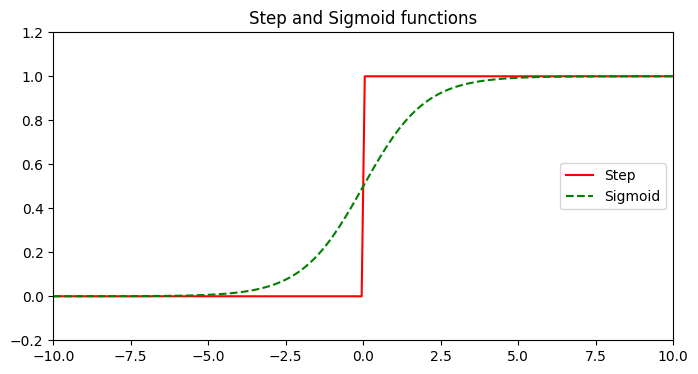

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

x = np.linspace(-10, 10, 200)
plt.plot(x, step(x), "r-", label="Step")
plt.plot(x, sigmoid(x), "g--", label="Sigmoid")

plt.legend(loc="center right")
plt.title("Step and Sigmoid functions")
plt.axis([-10, 10, -0.2, 1.2])

plt.show()

In the case of a the sigmoid function, the derivative is:

$\displaystyle \frac{\partial f}{\partial z} = \frac{\partial }{\partial z} \frac{1}{1 + e^z} = \frac{e^z}{(1+e^z)^2} = y(1-y)$

In [9]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

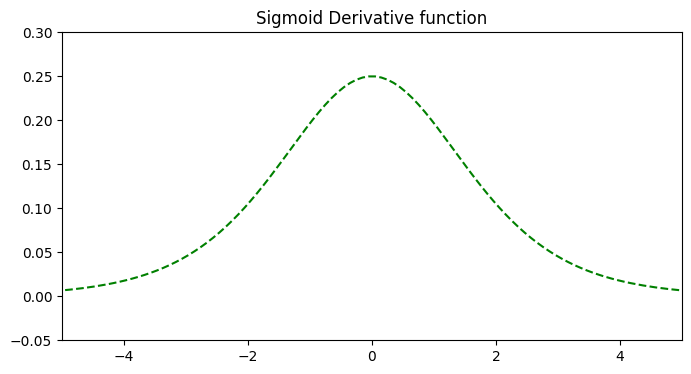

In [10]:
plt.figure(figsize=(8,4))

x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid_derivative(x), "g--")

plt.title("Sigmoid Derivative function")
plt.axis([-5, 5, -0.05, 0.3])

plt.show()

In that case we have the **sigmoid LTU**:

$\displaystyle y(x,w) = \sigma(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

and the update rule becomes:

$\displaystyle w_j = w_j + \eta \frac{1}{m} \sum\limits_{i=1}^{m} \left ( \delta(x^{(i)},w) y(x^{(i)},w)(1-y(x^{(i)},w))x^{(i)}_j \right )$

Considering the original LTU, the step activation function is not differentiable in zero and, even if we take the left or right limit, it not works as the gradient is always zero. However, we can see the the sigmoid function as a "smooth approximation" of the step function and we could think about just using a perceptron with a linear transfer function. In that case, the gradient is:

$\displaystyle \frac{\partial f}{\partial z} = \frac{\partial z}{\partial z} = 1$

so that we end up with the perceptron learning rule originally developed:

$\displaystyle w_j = w_j + \eta \frac{1}{m} \sum\limits_{i=1}^{m} \delta(x^{(i)},w) x^{(i)}_j$

Note that if the target and the output have the same value, then the sample is correctly classified and there are no updates. Otherwise, let's assume the target value 1 and the estimate wrong 0, then the update becomes: 

$\displaystyle w_j = w_j + \eta x^{(i)}_j$

which means that the weight is increased by the value of the input in order to increase the output. A symmetrical argument holds for the target 0 and and estimate 1, the update becomes 

$\displaystyle w_j = w_j - \eta x^{(i)}_j$, 

which means that the weight is decreased by the value of the input in order to decrease the output.

This rule is related to the **Widrow-Hoff learning rule** and the **Adaline rule**. These learning rules are nearly identical, but are sometimes used in slightly different contexts. It is often called the **delta rule** because the difference between the desired and actual output (difference between actual (training) data and hypothesis) is used to guide the learning.  If the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would [converge to a solution](https://medium.com/@adnanemajdoub/perceptron-convergence-theorem-c5b44cc06a08).

We can implement the updating rule for the original LTU:

In [11]:
def update_weights(weights, input, output, target, learning_rate):
    input = np.concatenate(([1], input))
    weights += learning_rate * (target - output) * input
    return weights

and the learning algorithm:

In [12]:
def training_ltu(x, y, weights, learning_rate=0.1, training_steps=100):
    for training_step in range(training_steps):
        sample_index = np.random.randint(0, len(x))
        output = ltu(weights, x[sample_index])
        weights = update_weights(weights, x[sample_index], output, y[sample_index], learning_rate)
    return weights

We can learn the correct weights for the AND gate providing examples of the truth table:

In [13]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
              
y = np.array([0, 0, 0, 1])

In [14]:
# Initialize weights randomly
weights = np.random.rand(3)

# Train the LTU
weights = training_ltu(x, y, weights)

print("Trained Weights: ", weights)

print("0 AND 0: ", ltu(weights, [0, 0]))
print("0 AND 1: ", ltu(weights, [0, 1]))
print("1 AND 0: ", ltu(weights, [1, 0]))
print("1 AND 1: ", ltu(weights, [1, 1]))

Trained Weights:  [-0.3541962   0.27111359  0.29463207]
0 AND 0:  0
0 AND 1:  0
1 AND 0:  0
1 AND 1:  1


We can also learn the correct weight for the OR gate providing examples of the truth table:

In [15]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
              
y = np.array([0, 1, 1, 1])

In [16]:
# Initialize weights randomly
weights = np.random.rand(3)

# Train the LTU
weights = training_ltu(x, y, weights)

print("Trained Weights: ", weights)

print("1 OR 1: ", ltu(weights, [1, 1]))
print("0 OR 1: ", ltu(weights, [0, 1]))
print("1 OR 0: ", ltu(weights, [1, 0]))
print("0 OR 0: ", ltu(weights, [0, 0]))

Trained Weights:  [-0.02504454  0.68377908  0.7982008 ]
1 OR 1:  1
0 OR 1:  1
1 OR 0:  1
0 OR 0:  0


A Perceptron is simply composed of a single layer of LTU neurons, with each neuron connected to all the inputs. It can classify instances simultaneously into multiple different binary classes, which makes it a multioutput classifier:

![](images/perceptron.png)

In [17]:
def perceptron(layer, inputs, activation):

    # store the outputs of each neuron
    outputs = []
    
    # iterate through each neuron in the layer
    for neuron in layer:
    
        # add bias term (1) to the input vector
        inputs_with_bias = np.concatenate(([1], inputs))
    
        # calculate the weighted sum
        weighted_sum = np.dot(inputs_with_bias, neuron)
    
        # apply sigmoid function to the weighted sum
        output = activation(weighted_sum)
    
        # store the output of the current neuron
        outputs.append(output)
    
    return np.array(outputs)

Scikit-Learn provides a **Perceptron class** that implements a single-TLU network. As an example, we can try it with the Iris dataset:

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

perceptron_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2, 0.5]])
print(y_pred)

[1]


The Perceptron is a powerful tool, however there are problems that simply can’t be solved. In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted the fact that it is **incapable of solving some trivial problems (e.g., the exclusive OR) classification problem**:

In [19]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
              
y = np.array([0, 1, 1, 0])

In [20]:
# Initialize weights randomly
weights = np.random.rand(3)

# Train the LTU
weights = training_ltu(x, y, weights, training_steps=10000)

print("Trained Weights: ", weights)

print("1 xOR 1: ", ltu(weights, [1, 1]))
print("0 xOR 1: ", ltu(weights, [0, 1]))
print("1 xOR 0: ", ltu(weights, [1, 0]))
print("0 xOR 0: ", ltu(weights, [0, 0]))

Trained Weights:  [ 0.15274387 -0.11338982  0.12970527]
1 xOR 1:  1
0 xOR 1:  1
1 xOR 0:  1
0 xOR 0:  1


This is true of any other linear classification model, but researchers had expected much more from the perceptron, and some were so disappointed that they dropped neural networks altogether, which led to the first **AI winter**. However, the Perceptron is still an important model, and it is the basis of more complex ANN architectures.

## Multilayer Perceptron

In order to solve the Perceptron limitations, we can use a **Multilayer Perceptron (MLP)**, which is composed of one input layer, one or more "internal" layers called **hidden layers**, and one final layer called the **output layer**. Neurons are interconnected to form a directed acyclic graph:

![](images/mlp.png)

In general, ANNs can be **graphs with many types of structures-acyclic or cyclic,
directed or undirected**. We now focus on the most common and practical
architecture: a fixed structure that corresponds to a directed acyclic graph. We can describe an MLP using a list of layers, where each layer is the list of the weights of all neurons in that layer:

In [21]:
network = [# hidden layer: 2 neurons
            np.array([[-30, 20, 20],       
                      [-10, 20, 20]]),     
          # output layer , 1 neuron
            np.array([[-30, -60, 60]])]

The output of the MLP is computed by propagating the input through all the layers. A sample is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer. The result is passed on to the next hidden layer, its output is computed and passed to the next hidden layer, and so on until we get the output of the output layer. This is called the **the forward pass**. To illustrate this process, we consider the three layer neural network with two inputs and one output:

![](images/forward.png)

In [22]:
def forward(network, inputs, activation):

    # iterate through each layer (forward)
    for layer in network:
        
        # calculate the output of the current layer
        outputs = perceptron(layer, inputs, activation)
        
        # the output of the current layer becomes the input to the next layer
        inputs = outputs
    
    return outputs

Using this more powerful structure, we can build also the XOR gate that we couldn’t build with a single perceptron:

In [23]:
print("0 xOR 0: ", forward(network, np.array([0, 0]), step))
print("0 xOR 1: ", forward(network, np.array([0, 1]), step))
print("1 xOR 0: ", forward(network, np.array([1, 0]), step))
print("1 xOR 1: ", forward(network, np.array([1, 1]), step))

0 xOR 0:  [0]
0 xOR 1:  [1]
1 xOR 0:  [1]
1 xOR 1:  [0]


As in the perceptron, we can compare the desired output and the actual output of the network in order to returns the measure of the error, but this works for the output layer, but how to compute the error signal for internal layers? It is impossible to compute error signal for internal neurons directly, because output values of these neurons are unknown. For many years the effective method for training multilayer networks has been unknown. Only in the middle 1980 the **backpropagation algorithm** has been worked out. 

The idea is **to propagate error signal back to all neurons, using the same weights used to make the predictions**. In order to do this, we exploit the partial derivative of the cost function with respect to any weight in the network, which tells us **how quickly the cost changes when we change a particular weight**. It is probably **the most fundamental building block in neural network**. It was first introduced in 1960s and almost 30 years later popularized by Rumelhart, Hinton and Williams in a famous paper called [Learning representations by back-propagating errors](https://www.nature.com/articles/323533a0).  As in the perceptron rule, this procedure repeatedly adjusts the weights of the connections in the network so as to minimize a measure of the difference between the actual output vector of the network and the desired output vector. It works using **two passes through the network (one forward, one backward)** and it is able to compute the gradient of the error with regard to every single model parameter. In other words, it can find out **how each connection weight should be tweaked in order to reduce the error**. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution. Let’s run through this algorithm in a bit more detail.

A sample (or a mini-batch of samples) is passed through all the layers, exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass:

In [24]:
def forward_pass(network, inputs, activation):
    
    # store the inputs and outputs of each layer
    layer_inputs = []
    layer_outputs = []

    for layer in network:
        
        # store the inputs of the current layer
        layer_inputs.append(inputs)
        
        outputs = perceptron(layer, inputs, activation)
        
        # store the outputs of the current layer
        layer_outputs.append(outputs)
        
        inputs = outputs
    
    return layer_inputs, layer_outputs

Next, the algorithm compares the desired output and the actual output of the network to measure error on the output layer. However, desired output of internal neurons are unknown. The backprobagation idea is **to propagate error signal back to all neurons, working backward until the algorithm reaches the input layer**. The weights used to propagate back are equal to these used during the computation of the output value. Only the direction of the data flow is changed. Let's denote units downstream of unit $j$ as $ds(j)$, then:

$\displaystyle \delta_j = \sum\limits_{k\epsilon \text{ds}(j)}w_{jk}\delta_k$

This reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

![](images/backward.png)


In [25]:
def backward_pass(network, targets, layer_outputs):

    # store the errors of each layer
    layer_errors = []
    
    # Calculate errors for the output layer
    errors = (targets - layer_outputs[-1])   
    layer_errors.insert(0, errors)
    
    # propagate the error through the network backwards
    for layer in reversed(network):
    
        # store the errors of each neuron in the hidden layer 
        hidden_errors = []
    
        # propagate the error to the previous layer
        for weights in layer.T:
            error = np.dot(weights, errors)
            # save the error for later use
            hidden_errors.append(error)
    
        # remove the propagated error on the bias term
        # the errors for the previous layer are the current errors
        errors = np.array(hidden_errors)[1:]
    
        # store the errors of the current layer
        layer_errors.insert(0, errors) 

    return layer_errors

Finally, the algorithm performs a learning step to tweak all the connection weights using the errors just computed. The rule used is actually similar to the delta rule used for single neuron, it updates the weights in proportion to the learning rate, the input to which the weight is applied, and the error. The difference is that the error term is the one evaluated in backward pass. 

![](images/error-propagation.png)

In [26]:
def update_pass(network, layer_errors, layer_inputs, learning_rate, derivative):    
    
    # iterate through each layer
    for i, layer in enumerate(network):
    
        # iterate through each neuron in the layer
        for j, neuron in enumerate(layer):
    
            # get the neuron inputs, output and error
            input_with_bias = np.concatenate(([1], layer_inputs[i]))
    
            # update the weights of the neuron
            weighted_sum = np.dot(input_with_bias, neuron)
            neuron += learning_rate * layer_errors[i+1][j] * input_with_bias * derivative(weighted_sum)

Now we can implement a complete backpropagation step:

In [27]:
def backpropagation_pass(network, inputs, targets, learning_rate, activation, derivative):
    layer_inputs, layer_outputs = forward_pass(network, inputs, activation)
    layer_errors = backward_pass(network, targets, layer_outputs)
    update_pass(network, layer_errors, layer_inputs, learning_rate, derivative)

In summary: for each training instance (or a batch of samples), the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step). As a result of the weight adjustments, **internal hidden neurons (which are not part of the input or output) come to represent important features of the task domain**, and the regularities in the task are captured by the interactions of these units. The ability to create useful "new features" distinguishes backpropagation from the earlier, simpler methods such as the perceptron procedure. Let’s try to learn the XOR network we previously designed by hand. We start by generating the training data and initializing our neural network:

In [28]:
# training data
xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
ys = np.array([[0], [1], [1], [0]])

In [29]:
np.random.seed(42)

# start with random weights
network = [ # layer: 2 neurons with 3 inputs
            np.random.rand(2, 3),
            # layer: 1 neuron with 3 inputs
            np.random.rand(1, 3)
          ]

Notice that it is important to initialize all the connection weights randomly, or else training will fail. For example, if we initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. If instead we randomly initialize the weights, we break the symmetry and allow backpropagation to train a diverse team of neurons.

In [30]:
learning_rate = 0.1
epochs = 10000;

for i in range(epochs): 
    for x,y in zip(xs, ys):
        backpropagation_pass(network, x, y, learning_rate, sigmoid, sigmoid_derivative);

In [31]:
print("0 xOR 0: ", forward(network, np.array([0, 0]), sigmoid))
print("0 xOR 1: ", forward(network, np.array([0, 1]), sigmoid))
print("1 xOR 0: ", forward(network, np.array([1, 0]), sigmoid))
print("1 xOR 1: ", forward(network, np.array([1, 1]), sigmoid))

0 xOR 0:  [0.04521225]
0 xOR 1:  [0.96346686]
1 xOR 0:  [0.96346319]
1 xOR 1:  [0.0363781]


## Activation Functions

The backpropagation algorithm works well with many other activation functions, not just the sigmoid function. Here are two other popular choices:

The **hyperbolic tangent function** is a S-shaped, continuous and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

$\displaystyle tanh(z) = 2\sigma(2z) - 1$

In [32]:
def tanh(x):
    return np.tanh(x)

The **Rectified Linear Unit (ReLU) function** is continuous but not differentiable at $x=0$ (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for $z<0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. 

$\displaystyle ReLU(z) = max(0,z)$

In [33]:
def relu(x):
    return np.maximum(0, x)

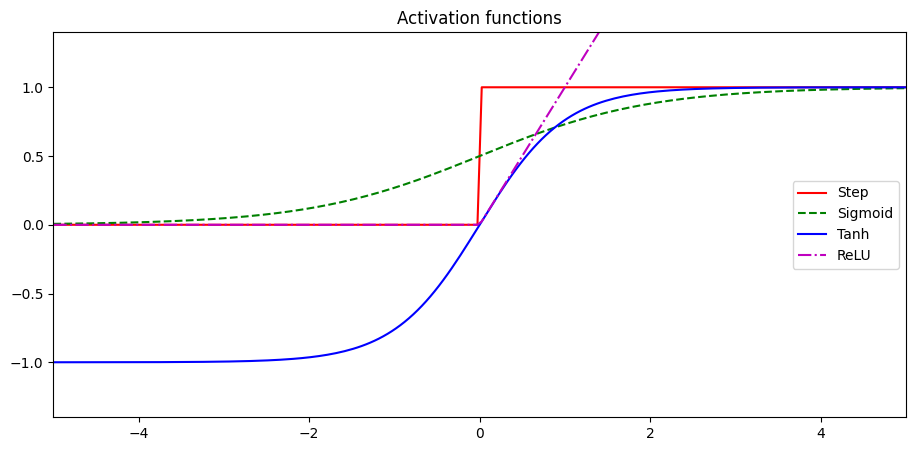

In [34]:
x = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,5))

plt.plot(x, step(x), "r-", label="Step")
plt.plot(x, sigmoid(x), "g--", label="Sigmoid")
plt.plot(x, tanh(x), "b-", label="Tanh")
plt.plot(x, relu(x), "m-.", label="ReLU")

plt.legend(loc="center right")
plt.title("Activation functions")
plt.axis([-5, 5, -1.4, 1.4])

plt.show()

We can show also the derivative of all the activation functions:

In [35]:
def derivative(f, x, eps=0.000001):
    return (f(x + eps) - f(x - eps))/(2 * eps)

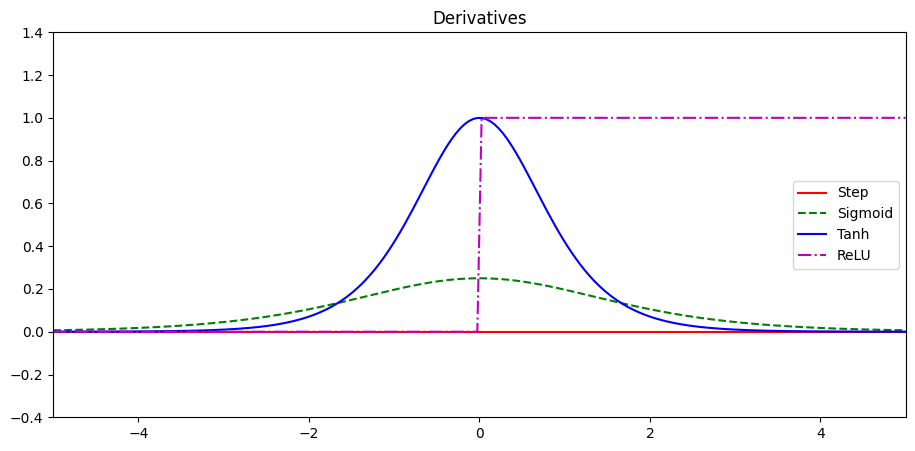

In [36]:
plt.figure(figsize=(11,5))

plt.plot(x, derivative(step, x), "r-", label="Step")
plt.plot(x, derivative(sigmoid, x), "g--", label="Sigmoid")
plt.plot(x, derivative(tanh, x), "b-", label="Tanh")
plt.plot(x, derivative(relu, x), "m-.", label="ReLU")

plt.title("Derivatives")
plt.legend(loc="center right")
plt.axis([-5, 5, -0.4, 1.4])

plt.show()

Why do we need activation functions? Well, if we chain several linear transformations, all we get is a linear transformation. So **if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that**. Conversely, a large enough ANN with nonlinear activations can theoretically approximate any continuous function.

## Hyperparameters Tuning

MLP can be **used for regression tasks**. If we want to predict a single value (e.g., the price of a house, given many of its features), then we just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), we need one output neuron per output dimension. For example, to locate the center of an object in an image, we need to predict 2D coordinates, so we need two output neurons. If we also want to place a bounding box around the object, then we need two more numbers: the width and the height of the object. So, we end up with four output neurons. Moreover, we don't use any activation function for the output neurons, so they are free to output any range of values. If we want to guarantee that the output will always be positive, then we can use the ReLU function in the output layer. Finally, if we want to guarantee that the predictions will fall within a given range of values, then we can use the logistic function or the hyperbolic tangent, and then scale the values to the appropriate range. The loss function to use during training is typically the mean squared error, but if we have a lot of outliers in the training set, we may prefer to use the mean absolute error instead. Alternatively, we can use the **Huber loss**, which is a combination of both: it is quadratic when the error is smaller than a threshold, but linear when the error is larger than that: 

$\displaystyle \text{Huber}(y, \hat{y}) = \Bigg \{ \begin{matrix} \frac{1}{2}(y - \hat{y})^2 & \text{if} & |y - \hat{y}| \leq \delta \\
\delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{if} & |y - \hat{y}| > \delta \end{matrix}$

where $\delta$ is the threshold. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error. The Huber loss is a good default when we are not sure which loss function to use.

MLP can also be **used for classification tasks**. For a binary classification problem, we just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which we can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number. MLP can also easily handle multi-label binary classification tasks: we would dedicate one output neuron for each positive class.  For example, we could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, we would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have non-urgent ham, urgent ham, non-urgent spam, and perhaps even urgent spam (although that would probably be an error). If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then we need to have one output neuron per class, and we should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss is generally a good choice.

MLP has many hyperparameters to tweak. Its flexibility is also one of its main drawbacks. We can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. **How do we know what combination of hyperparameters is the best for our task?** One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). However, it  helps to have an idea of what values are reasonable for each hyperparameter so that we can build a quick prototype and restrict the search space. The following are the typical hyperparameter values of an MLP architecture:

- number of input neurons: one per input feature (e.g. 28x28 for MNIST)
- number of hidden layers: depends on the problem, typically 1 to 5
- number of neurons per hidden layer: depends on the problem, typically 10 to 100
- number of output neurons: 1 per prediction dimension in regression tasks, 1 per class in classification tasks
- hidden activation function: ReLU
- output activation function: ReLU, Logistic or Tanh for regression, Logistic (binary and multi-label) or Softmax (multi-class) for classification
- loss function: MSE ore Huber (if outliers) for regression, cross entropy for classification.

For a review of best practices regarding tuning neural network hyperparameters, check out this excellent paper [A Disciplined Approach to Neural Network Hyperparameters](https://arxiv.org/abs/1803.09820)

**Number of Hidden Layers**. For many problems, we can begin with a single hidden layer and get reasonable results. An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But for complex problems, **deep networks have a much higher parameter efficiency than shallow ones**: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data. The reason is that **real-world data is often structured in a hierarchical way**, and deep neural networks automatically take advantage of this fact: **lower hidden layers model low-level structures** (e.g., line segments of various shapes and orientations), **intermediate hidden layers combine these low-level structures to model intermediate-level structures** (e.g., squares, circles), and the **highest hidden layers and the output layer combine these intermediate structures to model high-level structures** (e.g., faces). This also improves the ability of deeper network to generalize well to new datasets. For example, if we have already trained a model to recognize faces in pictures and we now want to train a new neural network to recognize hairstyles, we can kickstart the training by reusing the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures, it will only have to learn the higher-level structures. This is called **transfer learning**. For more complex problems, we can ramp up the number of hidden layers until we start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds) and they need a huge amount of training data. We will rarely have to train such networks from scratch: it is much more common to reuse parts of a pre-trained state-of-the-art network that performs a similar task.

**Number of Neurons per Hidden Layer**. The number of neurons in the input and output layers are determined by the type of input and output our task  requires.  As for the hidden layers, it used to be common **to size them to form a pyramid**, with fewer and fewer neurons at each layer. The rationale being that **many low-level features can coalesce into far fewer high-level features**. However, this practice has been largely abandoned because it seems that using **the same number of neurons in all hidden layers performs just as well in most cases, or even better**; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others. Just like the number of layers, we can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than we actually need, then use early stopping and other regularization techniques to prevent it from overfitting. We can adopt the **stretch pants approach**: instead of wasting time looking for pants that perfectly match our size, just use large stretch pants that will shrink down to the right size. Anyway, in general **it is better to increase the number of layers instead of the number of neurons per layer**.

**Learning rate** is arguably a really important hyperparameter. In general, the optimal learning rate is **about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges)**. One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^-5$ ) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration. If we plot the loss as a function of the learning rate, we should see it dropping at first. But after a while, the learning rate will be too large, so the loss will back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). We can then reinitialize our model and train it normally using this good learning rate. Anyway, the optimal learning rate depends on the other hyperparameters (especially the batch size) so if we modify any hyperparameter, we need to make sure to update the learning rate as well.

**Batch size** can have a significant impact on performance and training time. The main **benefit of using large batch sizes is that hardware accelerators (like GPUs) can process them efficiently**. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. However, **large batch sizes often lead to training instabilities**, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. A possible strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead. About the **Number of iterations**, in most cases, it does not actually need to be tweaked: just use early stopping instead.

Finally, choosing a better **optimizer** than plain old mini-batch Gradient Descent is also quite important. We will see several advanced optimizers in more advanced topic. As for the activation function, the **ReLU activation** function is a good default for all hidden layer and for the output layer, it really depends on the task.

We can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space.  To do this, we need to wrap our models in objects that mimic regular Scikit-Learn models. Using randomized or grid search is not too hard, and it works well for many fairly simple problems. When training is slow, however this approach will only explore a tiny portion of the hyperparameter space. we can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This approach will hopefully **zoom in on a good set of hyperparameters**. However, it’s very time consuming, and probably not the best use of our time. Fortunately, there are **many techniques to explore a search space much more efficiently than randomly**. Their core idea is simple: **when a region of the space turns out to be good, it should be explored more**. Such techniques take care of the “zooming” process for us and lead to much better solutions in much less time. Many companies offer services for hyperparameter optimization. Hyperparameter tuning is still an active area of research, and **evolutionary algorithms** can be applied. For example, check paper [Population Based Training of Neural Networks](https://arxiv.org/abs/1711.09846). Google used an evolutionary approach with the [AutoML](https://cloud.google.com/automl/) suite, which is already available as a cloud service. Evolutionary algorithms have been used successfully to train individual neural networks, replacing the ubiquitous Gradient Descent. For getting more information, you can check the [**Deep Neuroevolution technique**](https://eng.uber.com/deep-neuroevolution/).

But despite all this exciting progress and all these tools and services, it still helps to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict the search space.

## Exercise

**1 - Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data() using Keras. See if you can get over 98% precision. Try searching for the optimal learning rate (by growing the learning rate exponentially, plotting the error, and finding the point where the error shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.**

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch and plot the loss as a function of the learning rate:

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently around 3e-1, so let's try using 2e-1 as our learning rate:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [ ]:
#%tensorboard --logdir=./my_mnist_logs --port=6006